Imports

In [1]:
import cv2
import time
from deepface import DeepFace
import pandas as pd
import webbrowser
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('C:/Users/ESHOP/Downloads/mood_song.csv')

EDA (Exploratory Data Analysis)

In [3]:
df.head()

Unnamed: 0.1  Unnamed: 0  duration (ms)  danceability  energy  loudness  \
0             0           0       195000.0         0.611   0.614    -8.815   
1             1           1       194641.0         0.638   0.781    -6.848   
2             2           2       217573.0         0.560   0.810    -8.029   
3             3           3       443478.0         0.525   0.699    -4.571   
4             4           4       225862.0         0.367   0.771    -5.863   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0672        0.0169          0.000794    0.7530    0.520  128.050   
1       0.0285        0.0118          0.009530    0.3490    0.250  122.985   
2       0.0872        0.0071          0.000008    0.2410    0.247  170.044   
3       0.0353        0.0178          0.000088    0.0888    0.199   92.011   
4       0.1060        0.3650          0.000001    0.0965    0.163  115.917   

      spec_rate  labels                                   uri  
0  3.446154e-07       2  spotify:track:3v6sBj3swihU8pXQQHhDZo  
1  1.464234e-07       1  spotify:track:7KCWmFdw0TzoJbKtqRRzJO  
2  4.007850e-07       1  spotify:track:2CY92qejUrhyPUASawNVRr  
3  7.959809e-08       0  spotify:track:11BPfwVbB7vok7KfjBeW4k  
4  4.693131e-07       1  spotify:track:3yUJKPsjvThlcQWTS9ttYx

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277938 entries, 0 to 277937
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      277938 non-null  int64  
 1   Unnamed: 0        277938 non-null  int64  
 2   duration (ms)     277938 non-null  float64
 3   danceability      277938 non-null  float64
 4   energy            277938 non-null  float64
 5   loudness          277938 non-null  float64
 6   speechiness       277938 non-null  float64
 7   acousticness      277938 non-null  float64
 8   instrumentalness  277938 non-null  float64
 9   liveness          277938 non-null  float64
 10  valence           277938 non-null  float64
 11  tempo             277938 non-null  float64
 12  spec_rate         277938 non-null  float64
 13  labels            277938 non-null  int64  
 14  uri               277938 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 31.8+ MB


In [5]:
df.describe()

Unnamed: 0.1     Unnamed: 0  duration (ms)   danceability  \
count  277938.000000  277938.000000   2.779380e+05  277938.000000   
mean   138968.500000  138968.500000   2.324961e+05       0.552583   
std     80233.933896   80233.933896   1.171830e+05       0.188905   
min         0.000000       0.000000   6.706000e+03       0.000000   
25%     69484.250000   69484.250000   1.720130e+05       0.431000   
50%    138968.500000  138968.500000   2.131055e+05       0.571000   
75%    208452.750000  208452.750000   2.648660e+05       0.693000   
max    277937.000000  277937.000000   3.919895e+06       0.989000   

              energy       loudness    speechiness   acousticness  \
count  277938.000000  277938.000000  277938.000000  277938.000000   
mean        0.556866     -10.363654       0.087913       0.386583   
std         0.279681       6.672049       0.112500       0.364504   
min         0.000000     -60.000000       0.000000       0.000000   
25%         0.342000     -12.747000       0.035900       0.033800   
50%         0.591000      -8.397000       0.047100       0.262000   
75%         0.792000      -5.842000       0.082200       0.754000   
max         1.000000       4.882000       0.965000       0.996000   

       instrumentalness       liveness        valence          tempo  \
count     277938.000000  277938.000000  277938.000000  277938.000000   
mean           0.255044       0.189217       0.449602     119.196002   
std            0.373745       0.163596       0.267471      30.462256   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.096200       0.220000      95.072250   
50%            0.001090       0.121000       0.434000     119.940000   
75%            0.645000       0.227000       0.665000     138.869750   
max            1.000000       1.000000       1.000000     244.947000   

          spec_rate         labels  
count  2.779380e+05  277938.000000  
mean   4.754654e-07       1.179101  
std    9.190229e-07       1.021033  
min    0.000000e+00       0.000000  
25%    1.531461e-07       0.000000  
50%    2.345459e-07       1.000000  
75%    4.449937e-07       2.000000  
max    5.971860e-05       3.000000

In [6]:
df.size

4169070

In [7]:
df.shape

(277938, 15)

In [8]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'spec_rate', 'labels', 'uri'],
      dtype='object')

In [9]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
uri                 0
dtype: int64

Data Preprocessing

In [10]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [11]:
df.head()

duration (ms)  danceability  energy  loudness  speechiness  acousticness  \
0       195000.0         0.611   0.614    -8.815       0.0672        0.0169   
1       194641.0         0.638   0.781    -6.848       0.0285        0.0118   
2       217573.0         0.560   0.810    -8.029       0.0872        0.0071   
3       443478.0         0.525   0.699    -4.571       0.0353        0.0178   
4       225862.0         0.367   0.771    -5.863       0.1060        0.3650   

   instrumentalness  liveness  valence    tempo     spec_rate  labels  \
0          0.000794    0.7530    0.520  128.050  3.446154e-07       2   
1          0.009530    0.3490    0.250  122.985  1.464234e-07       1   
2          0.000008    0.2410    0.247  170.044  4.007850e-07       1   
3          0.000088    0.0888    0.199   92.011  7.959809e-08       0   
4          0.000001    0.0965    0.163  115.917  4.693131e-07       1   

                                    uri  
0  spotify:track:3v6sBj3swihU8pXQQHhDZo  
1  spotify:track:7KCWmFdw0TzoJbKtqRRzJO  
2  spotify:track:2CY92qejUrhyPUASawNVRr  
3  spotify:track:11BPfwVbB7vok7KfjBeW4k  
4  spotify:track:3yUJKPsjvThlcQWTS9ttYx

In [12]:
#Create mood name column from 'labels' using the mapping
mood_map = {0: 'sad', 1: 'happy', 2: 'energetic', 3: 'calm'}
df['mood'] = df['labels'].map(mood_map)

In [13]:
# Create playable Spotify links from clean 'uri' column
df['playable_url'] = 'https://open.spotify.com/track/' + df['uri'].str.split(':').str[-1]

Visualization

In [14]:
from matplotlib.colors import LinearSegmentedColormap

# Set music-themed color palette
music_palette = ["#1DB954", "#191414", "#FFFFFF", "#B3B3B3", "#535353"]
spotify_gradient = LinearSegmentedColormap.from_list("spotify", ["#191414", "#1DB954"])

# Configure style
plt.style.use('dark_background')
sns.set_palette(music_palette)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.edgecolor'] = '#B3B3B3'

In [15]:
# Ensure conversion from ms to minutes is working
df['duration_min'] = df['duration (ms)'] / 60000
print(df['duration_min'].describe())  # Verify conversion

count    277938.000000
mean          3.874935
std           1.953050
min           0.111767
25%           2.866883
50%           3.551758
75%           4.414433
max          65.331583
Name: duration_min, dtype: float64


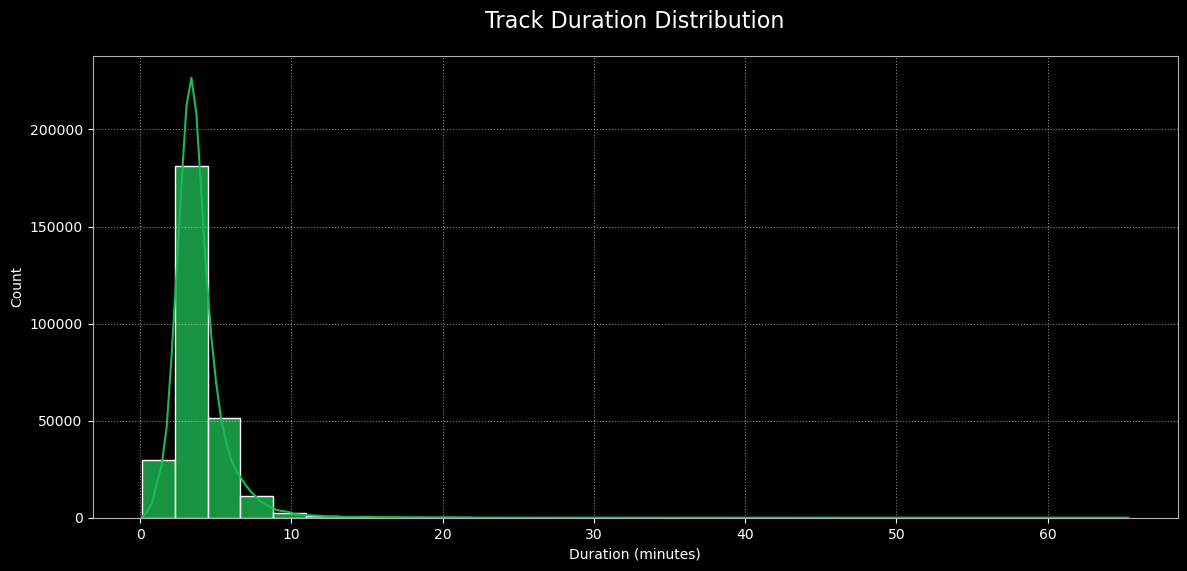

In [16]:
 # Duration Distribution (with pulse effect)
plt.figure(figsize=(14, 6))
ax = sns.histplot(df['duration (ms)']/60000, bins=30, kde=True, color='#1DB954', alpha=0.8)
plt.title('Track Duration Distribution', fontsize=16, pad=20)
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
ax.grid(True, linestyle=':', alpha=0.5)
plt.show()

In [17]:
from math import pi

moods = df['labels'].unique()
features = ['danceability', 'energy', 'loudness', 
            'speechiness', 'acousticness', 'valence']
def plot_mood_radar(df, mood_label, top_n=3):
    mood_name = mood_map.get(mood_label, str(mood_label))
    subset = df[df['labels'] == mood_label].nlargest(top_n, 'energy')
    
    plt.figure(figsize=(10, 10))
    
    for idx, row in subset.iterrows():
        values = row[features].tolist()
        values += values[:1]  # Close the radar loop
        
        angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
        angles += angles[:1]
        
        ax = plt.subplot(111, polar=True)
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"Track {idx}", alpha=0.7)
        ax.fill(angles, values, alpha=0.1)
    
    plt.xticks(angles[:-1], features, color='white', size=10)
    plt.yticks(color="white", size=7)
    plt.title(f'Audio Signature: {mood_name.capitalize()} Tracks', size=15, y=1.1, color='#1DB954')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

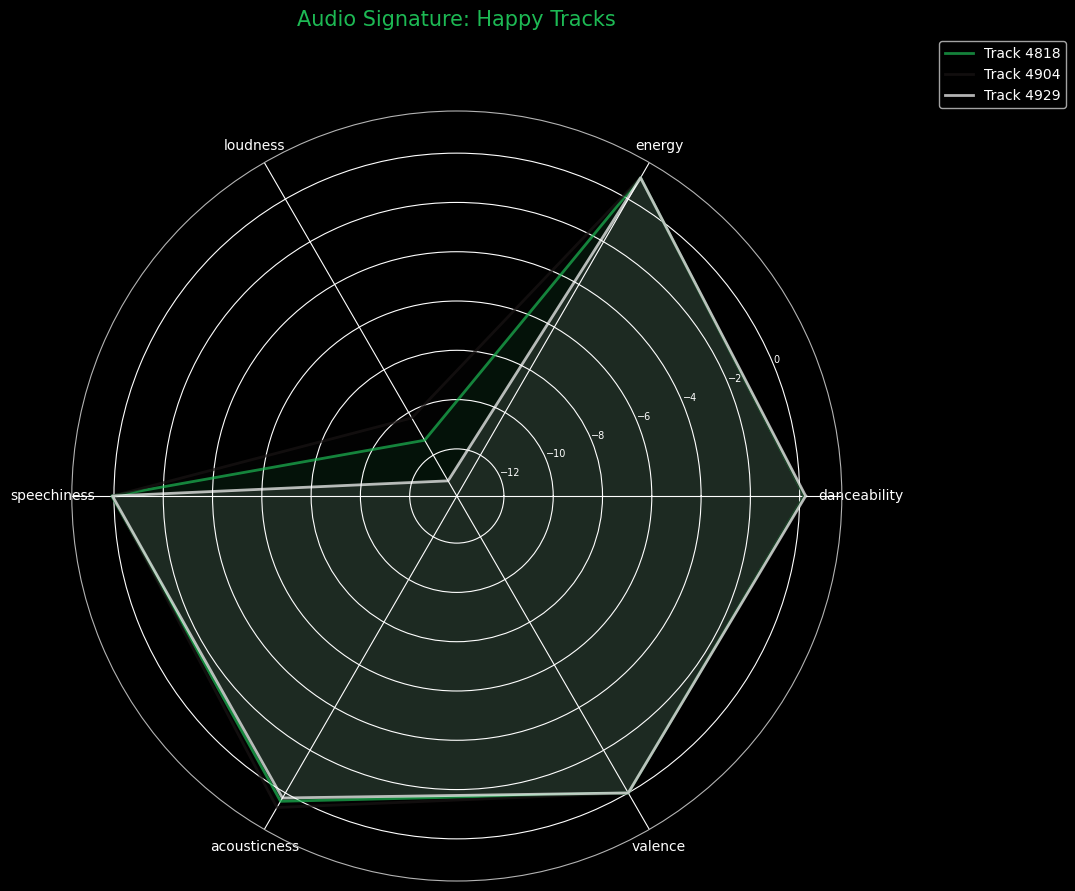

In [18]:
# To plot just "happy" tracks radar chart:
plot_mood_radar(df, mood_label=1)

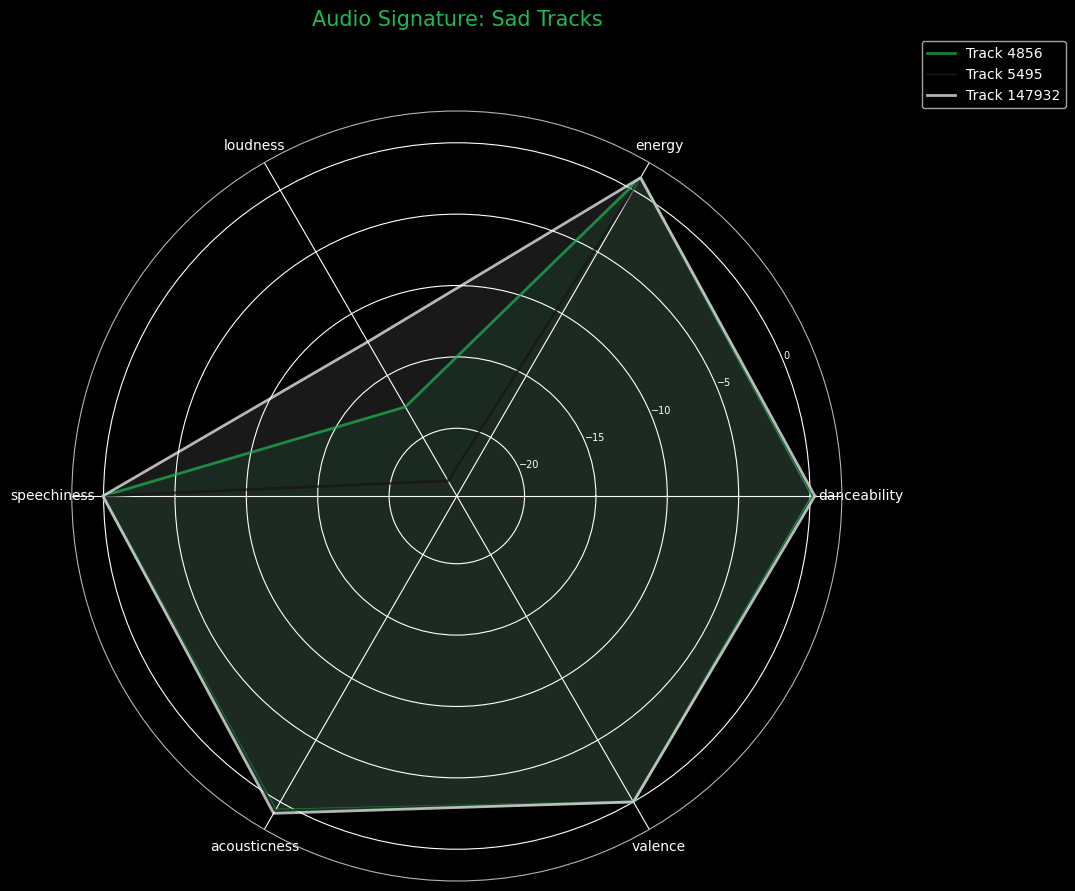

In [19]:
# To plot just "sad" tracks radar chart:
plot_mood_radar(df, mood_label=0)

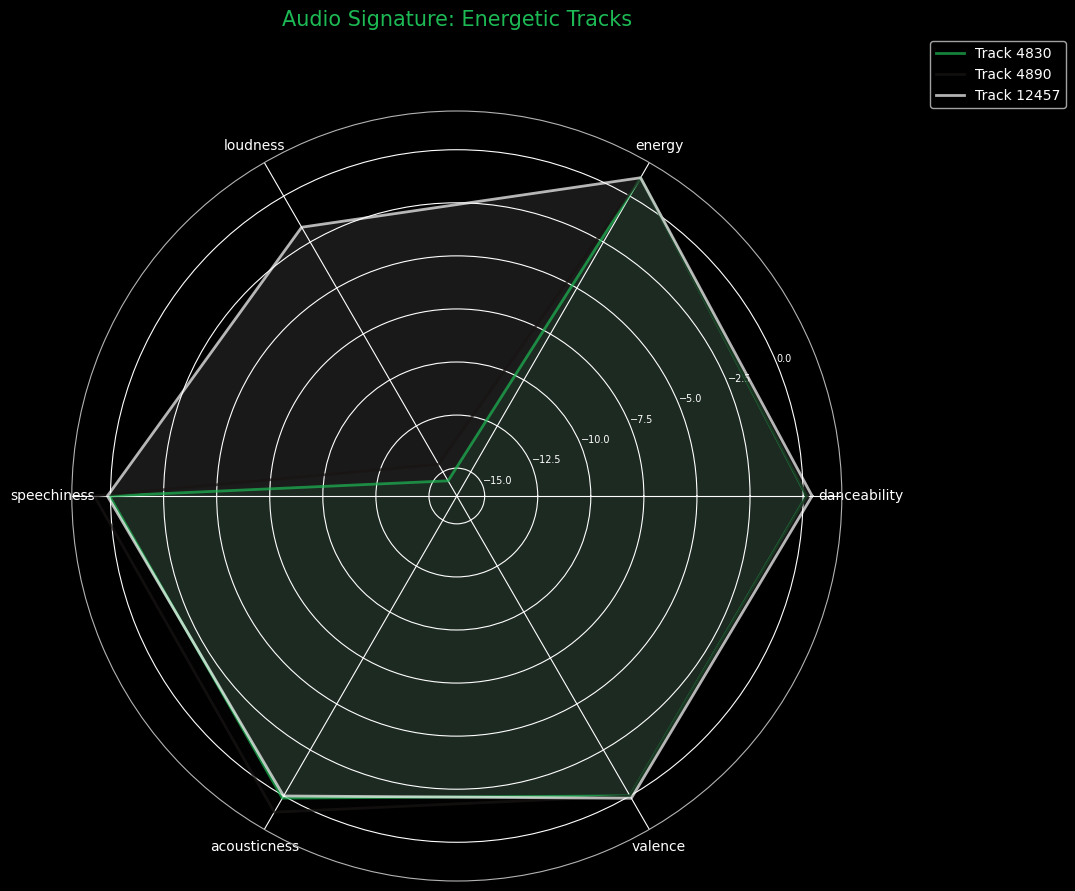

In [20]:
# For "energetic"
plot_mood_radar(df, mood_label=2)

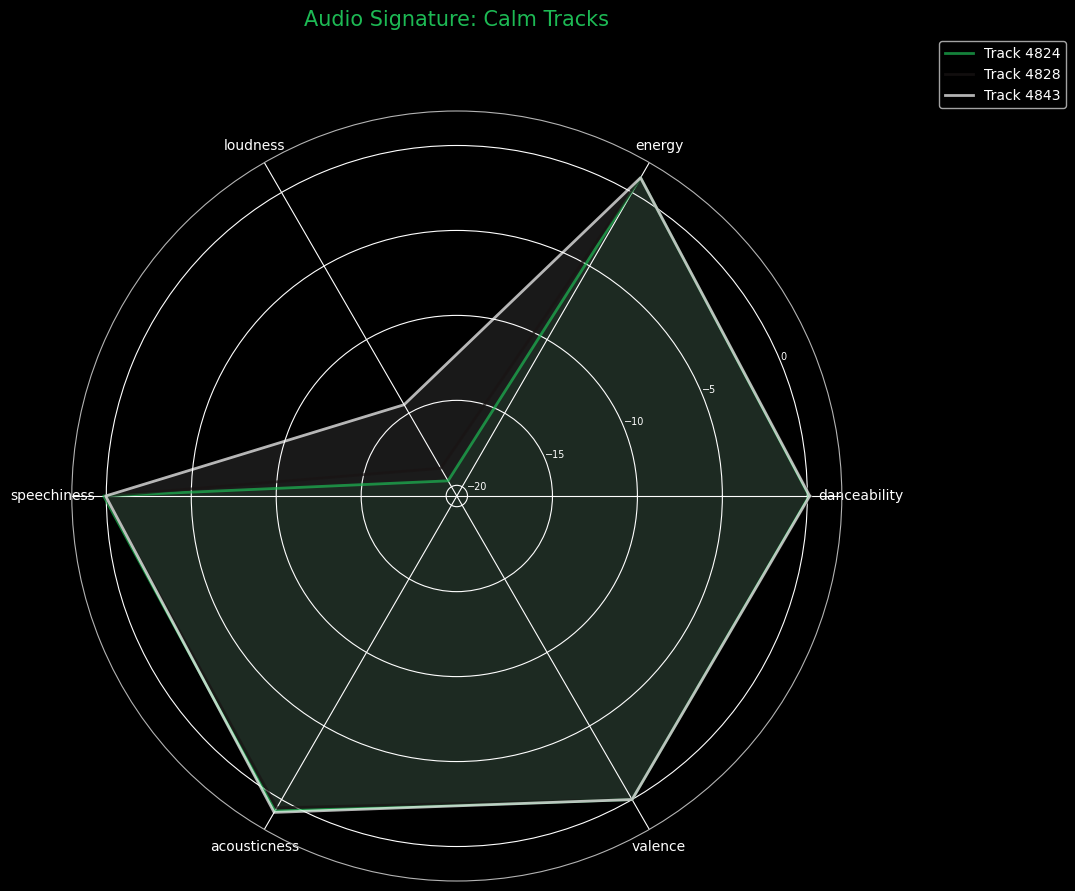

In [21]:
# For "calm"
plot_mood_radar(df, mood_label=3)

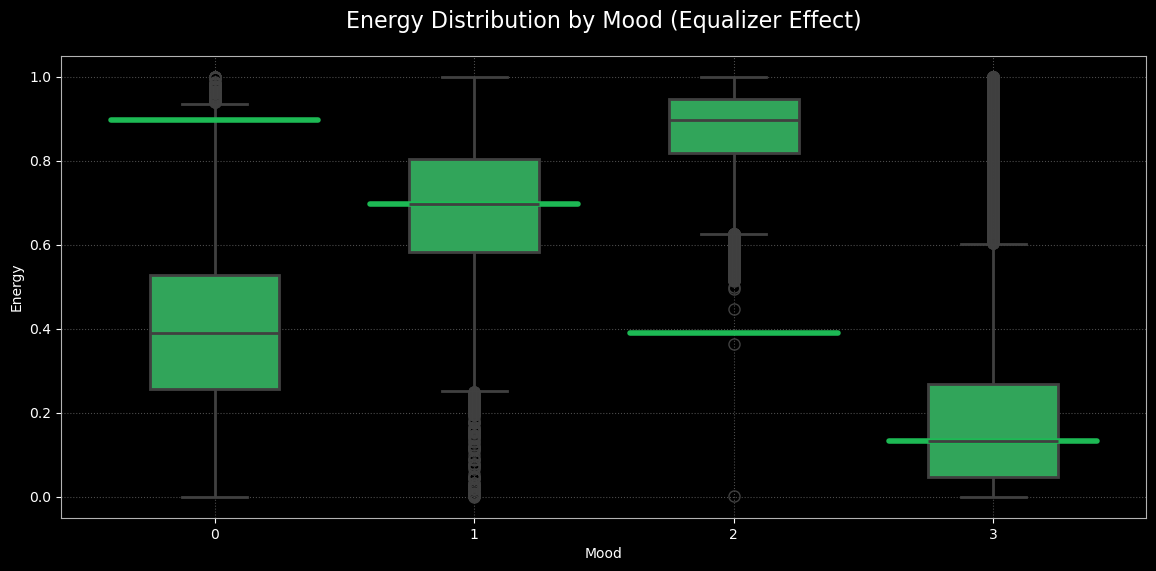

In [22]:
# Mood Energy Comparison (Equalizer Style)
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='labels', y='energy', data=df,width=0.5, linewidth=2, flierprops=dict(marker='o', markersize=8))
    
    # Add equalizer bars
for i, mood in enumerate(moods):
    median = df[df['labels'] == mood]['energy'].median()
    ax.plot([i-0.4, i+0.4], [median, median], color='#1DB954', linewidth=4, solid_capstyle='round')
    
plt.title('Energy Distribution by Mood (Equalizer Effect)', 
             fontsize=16, pad=20)
plt.xlabel('Mood')
plt.ylabel('Energy')
ax.grid(True, linestyle=':', alpha=0.3)
plt.show()


Generating interactive pairplot...


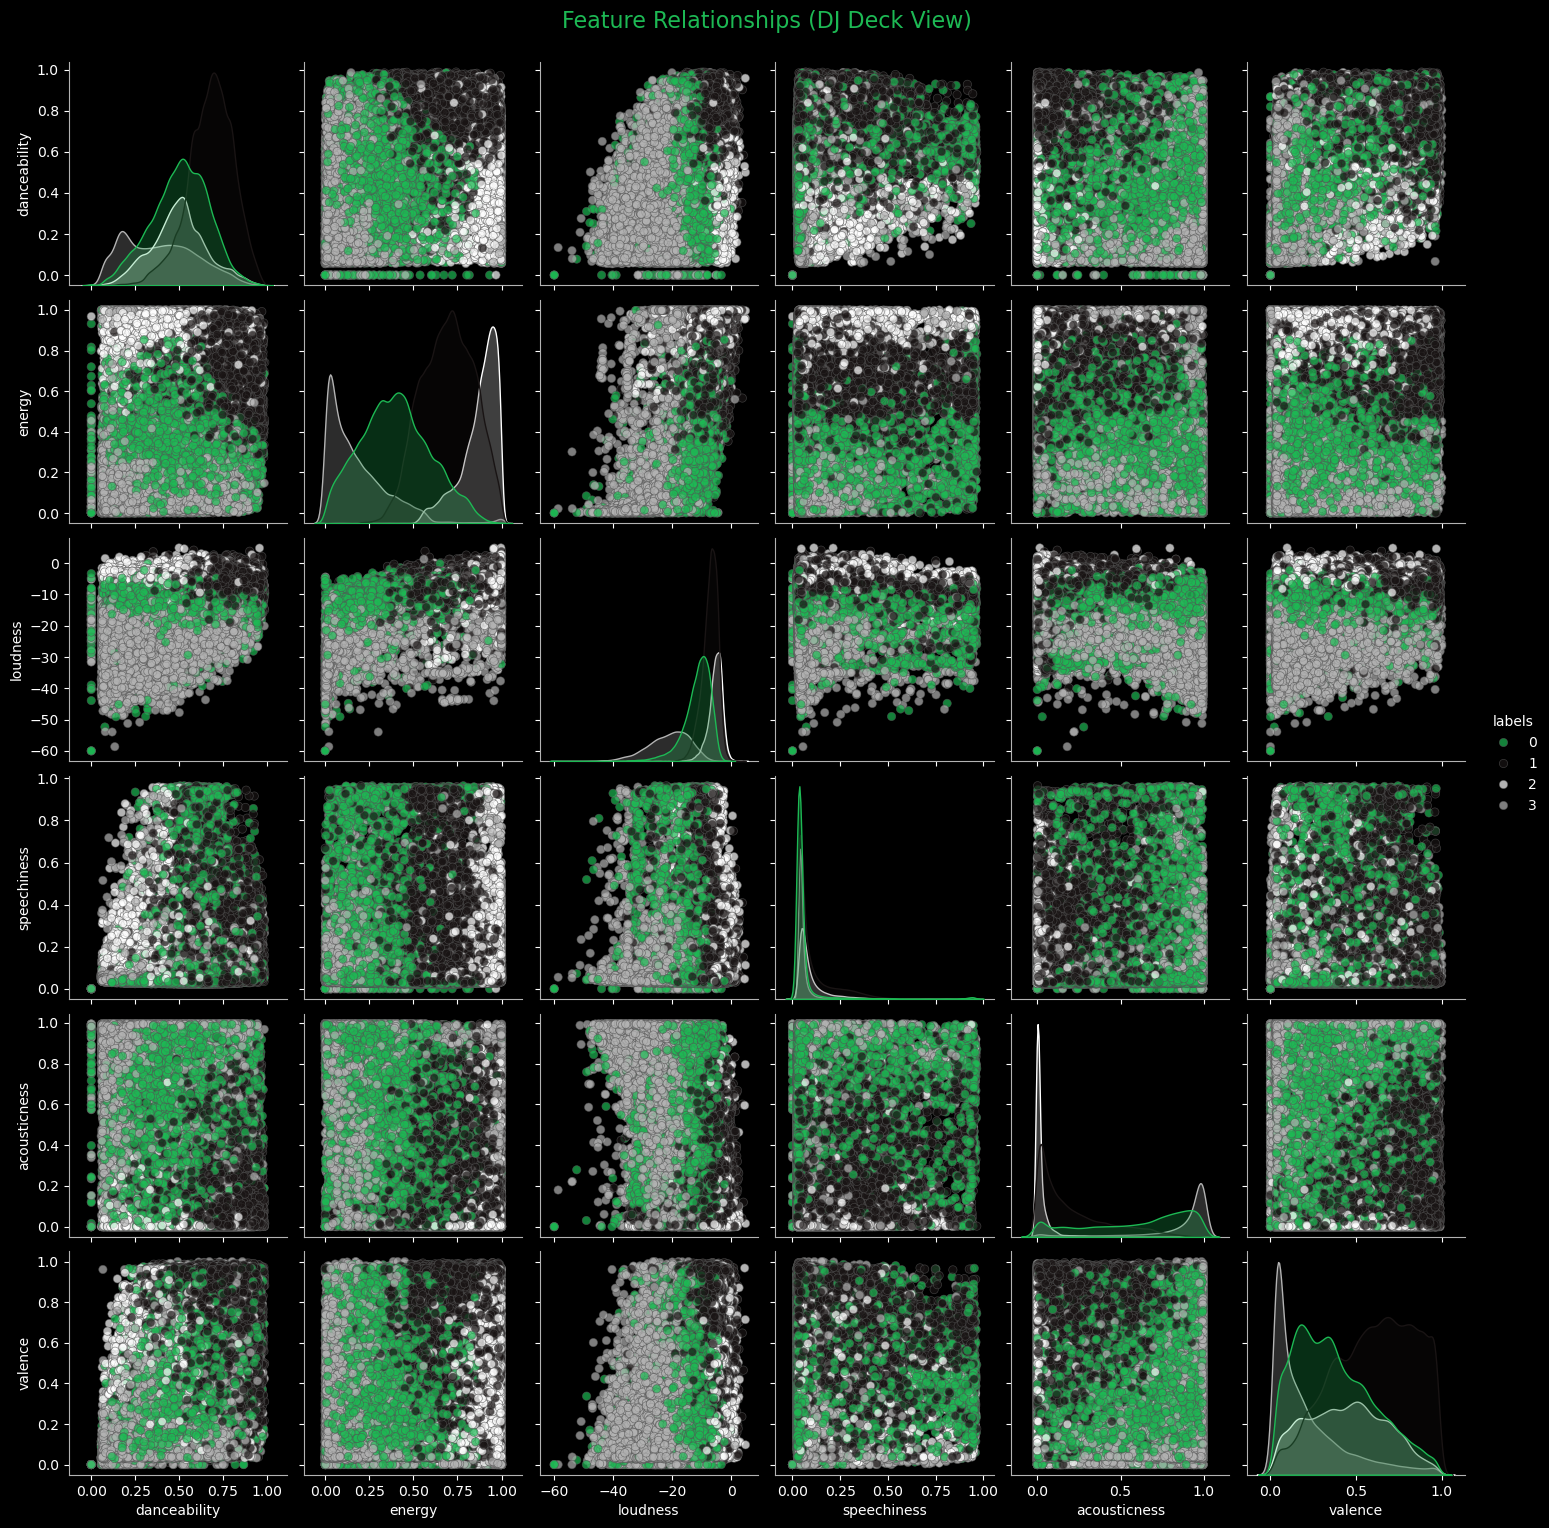

In [23]:
 # Feature Pairplot (DJ Deck Style)
print("\nGenerating interactive pairplot...")
g = sns.pairplot(df[features + ['labels']], 
                hue='labels', 
                palette=music_palette,
                plot_kws=dict(alpha=0.7, edgecolor='#535353'),
                diag_kind='kde')
g.fig.suptitle('Feature Relationships (DJ Deck View)', y=1.02, fontsize=16, color='#1DB954')
plt.show()

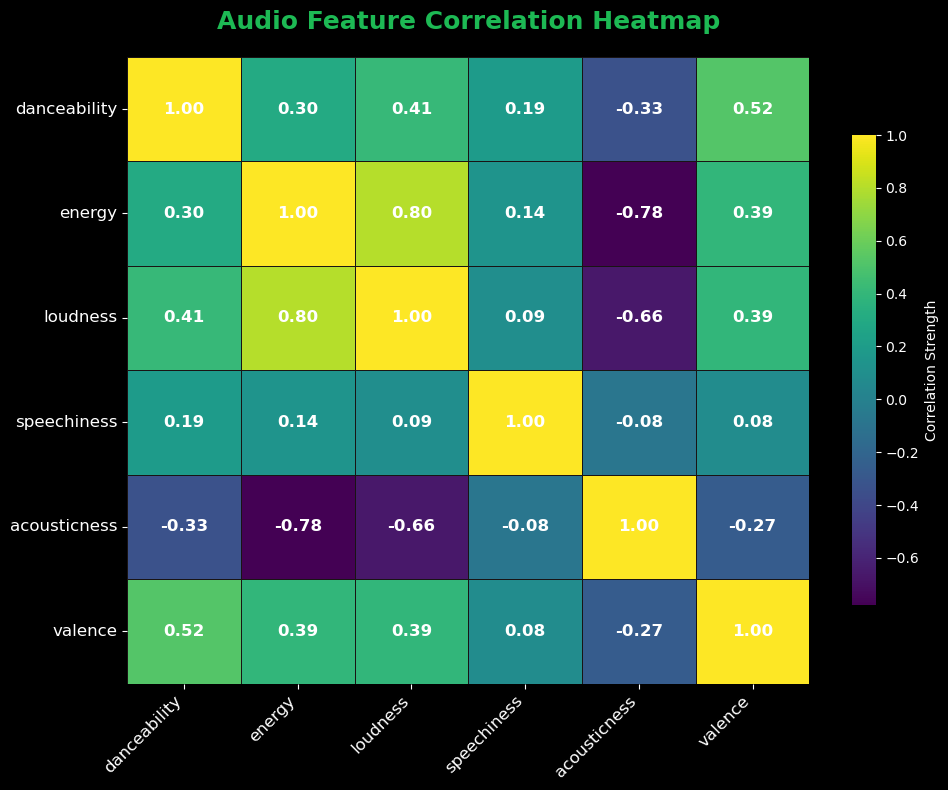

In [24]:
# Compute correlation matrix
corr = df[features].corr()

# Set up figure
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap="viridis", 
    linewidths=0.5, 
    linecolor='#191414',
    cbar_kws={"shrink": .75, "label": "Correlation Strength"},
    annot_kws={"size": 12, "weight": "bold", "color": "white"}
)

plt.title("Audio Feature Correlation Heatmap", fontsize=18, color='#1DB954', weight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')
plt.yticks(rotation=0, fontsize=12, color='white')
plt.tight_layout()
plt.show()

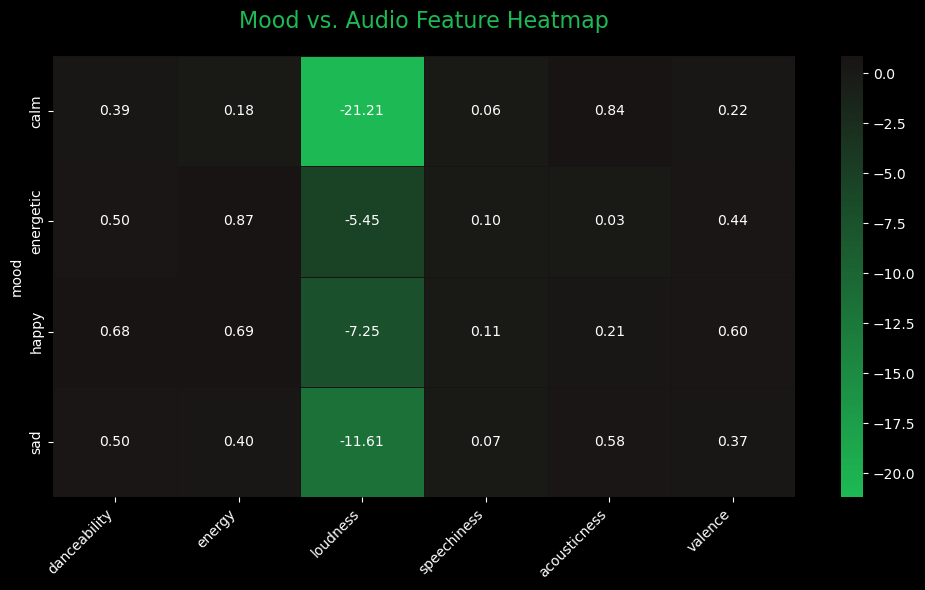

In [25]:
# Mood vs. Feature Heatmap 
mood_feature_avg = df.groupby('mood')[features].mean().round(2)

spotify_cmap = LinearSegmentedColormap.from_list("spotify_gradient", ["#1DB954", "#191414"], N=100)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    mood_feature_avg, 
    annot=True, fmt='.2f', 
    cmap=spotify_cmap, 
    linewidths=0.5, 
    linecolor='#191414',
    annot_kws={"color": "white", "fontsize": 10}
)

plt.title('Mood vs. Audio Feature Heatmap', fontsize=16, color='#1DB954', pad=20)
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#191414')
plt.tight_layout()
plt.show()

In [24]:
import random
import math

df = df[df['mood'].isin(['happy', 'sad', 'energetic', 'calm'])]

print("Capturing your mood... pulling your vibe from Spotify.")

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
if not cap.isOpened():
    print("Error: Could not open video capture")
    exit()

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

WINDOW_WIDTH, WINDOW_HEIGHT = 900, 600

# color palette
UI_COLORS = {
    'background': (5, 0, 10),                  # Near-black with purple undertone
    'primary': (120, 40, 180),                 # Deep purple (less vibrant)
    'secondary': (15, 5, 25),                  # Darkest panel (almost black)
    'text_light': (220, 200, 240),             # Soft lavender (less bright)
    'text_muted': (100, 80, 120),              # Muted purple-gray
    'mood_happy': (255, 180, 50),              # Darker gold
    'mood_sad': (70, 130, 200),                # Deeper blue
    'mood_energetic': (220, 60, 130),          # Darker pink
    'mood_calm': (130, 90, 200)                # Deeper light purple
}

analysis_interval = 5
last_analysis = 0
current_emotion = "No face detected"
current_mood = None
last_played_url = None
confidence_threshold = 60

emotion_to_mood = {
    'happy': 'happy',
    'sad': 'sad',
    'disgust': 'energetic',
    'surprise': 'energetic',
    'fear': 'calm',
    'angry': 'calm',
    'neutral': 'neutral'
}

def play_mood_music(mood):
    global last_played_url
    if mood == 'neutral':
        return None
    mood_songs = df[df['mood'] == mood]
    if len(mood_songs) == 0:
        print(f"No songs found for mood: {mood}")
        return None
    available_songs = mood_songs[mood_songs['playable_url'] != last_played_url]
    if len(available_songs) == 0:
        available_songs = mood_songs
    selected_song = available_songs.sample(1).iloc[0]
    playable_url = selected_song['playable_url']
    webbrowser.open(playable_url, new=2)
    print(f"Now playing for mood: {mood}")
    last_played_url = playable_url
    return selected_song['uri'].split(':')[-1]

def draw_text(img, text, pos, font_scale=0.7, color=UI_COLORS['text_light'], thickness=2):
    glow = (color[0] // 3, color[1] // 3, color[2] // 3)
    cv2.putText(img, text, (pos[0]+1, pos[1]+1), cv2.FONT_HERSHEY_SIMPLEX, font_scale, glow, thickness + 2, cv2.LINE_AA)
    cv2.putText(img, text, pos, cv2.FONT_HERSHEY_SIMPLEX, font_scale, color, thickness, cv2.LINE_AA)

def draw_mood_circle(img, mood, center, radius=30):
    colors = {
        'happy': UI_COLORS['mood_happy'],
        'sad': UI_COLORS['mood_sad'],
        'energetic': UI_COLORS['mood_energetic'],
        'calm': UI_COLORS['mood_calm'],
        'neutral': (100, 100, 100)
    }
    emojis = {
        'happy': ":)",
        'sad': ":(",
        'energetic': ":D",
        'calm': ":|",
        'neutral': ":/"
    }
    color = colors.get(mood, (100, 100, 100))
    cv2.circle(img, center, radius, color, -1)
    emoji_text = emojis.get(mood, "?")
    text_size = cv2.getTextSize(emoji_text, cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)[0]
    draw_text(img, emoji_text, (center[0] - text_size[0]//2, center[1] + text_size[1]//2), 
              font_scale=1.2, color=(0, 0, 0), thickness=3)

def create_ui_frame():
    frame = np.zeros((WINDOW_HEIGHT, WINDOW_WIDTH, 3), dtype=np.uint8)
    frame[:] = UI_COLORS['background']

    # Pure black header with subtle purple edge
    header = frame.copy()
    cv2.rectangle(header, (0, 0), (WINDOW_WIDTH, 80), (10, 0, 20), -1)  # Darkest purple-black
    cv2.rectangle(header, (0, 78), (WINDOW_WIDTH, 80), UI_COLORS['primary'], -1)  # Thin purple line
    cv2.addWeighted(header, 0.95, frame, 0.05, 0, frame)
    
    # Text with subtle glow
    draw_text(frame, "MOODIFY", (30, 55), 
             font_scale=1.8, 
             color=UI_COLORS['primary'], 
             thickness=3)
    draw_text(frame, "emotion-driven music", (30, 85), 
             font_scale=0.6, 
             color=UI_COLORS['text_muted'], 
             thickness=1)

    # Footer - minimalist black bar with purple accent
    cv2.rectangle(frame, (0, WINDOW_HEIGHT-40), (WINDOW_WIDTH, WINDOW_HEIGHT), (8, 0, 15), -1)
    cv2.rectangle(frame, (0, WINDOW_HEIGHT-40), (WINDOW_WIDTH, WINDOW_HEIGHT-38), UI_COLORS['primary'], -1)
    
    # Left-aligned footer text
    draw_text(frame, "ESC to exit | Smile to change music", 
             (20, WINDOW_HEIGHT-15), 
             font_scale=0.6, 
             color=UI_COLORS['text_light'],
             thickness=1)
    
    return frame

def draw_waveform(ui_frame, height=50, color=UI_COLORS['primary'], animate=False):
    """Draw music wave above footer - animated when mood detected, static when neutral"""
    # Positioning - centered above footer with margins
    wave_area_height = 80  # Space reserved for waveform
    wave_y_center = WINDOW_HEIGHT - 40 - wave_area_height//2  # 40px footer height
    wave_x_start = 150  # Left margin
    wave_x_end = WINDOW_WIDTH - 150  # Right margin
    available_width = wave_x_end - wave_x_start
    
    # Generate wave points - dynamic if animate=True, static if False
    if animate:
        time_offset = time.time() * 2
    else:
        time_offset = 0  # Static position
    
    wave_points = []
    for i in range(25):  # Fewer bars for cleaner look
        if animate:
            # Musical wave pattern with animation
            main_wave = math.sin(i/1.5 + time_offset) * 0.7
            harmonic = math.cos(i/0.8 + time_offset*1.3) * 0.3
            wave_height = int(height * (main_wave + harmonic))
        else:
            # Static wave pattern
            wave_height = int(height * 0.3)  # Small static wave
        wave_points.append(wave_height)
    
    # Calculate bar dimensions
    bar_count = len(wave_points)
    bar_width = max(8, available_width // (bar_count * 2))  # Dynamic width
    spacing = available_width // bar_count
    
    # Draw the waveform
    for i, h in enumerate(wave_points):
        x = wave_x_start + i * spacing
        bar_center = x + spacing//2
        
        # Gradient colored bar
        for w in range(bar_width):
            alpha = 0.6 + 0.4 * (abs(h)/height)  # Height-based intensity
            fade_color = tuple(int(c * alpha) for c in color)
            cv2.line(ui_frame,
                    (bar_center - bar_width//2 + w, wave_y_center - h//2),
                    (bar_center - bar_width//2 + w, wave_y_center + h//2),
                    fade_color,
                    1)
        
        # Highlight core of the bar
        highlight_color = tuple(min(c + 60, 255) for c in color)
        cv2.line(ui_frame,
                (bar_center, wave_y_center - h//2),
                (bar_center, wave_y_center + h//2),
                highlight_color,
                2)

    # Add subtle baseline
    cv2.line(ui_frame,
            (wave_x_start, wave_y_center),
            (wave_x_end, wave_y_center),
            (80, 40, 100),  # Dark purple line
            1)

try:
    mood_detected = False
    waveform_animation_active = False
    
    while True:
        ui_frame = create_ui_frame()
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame.")
            break
        frame = cv2.flip(frame, 1)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        if len(faces) == 0:
            current_emotion = "No face detected"
            mood_detected = False
            waveform_animation_active = False

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), UI_COLORS['primary'], 2)

            if time.time() - last_analysis > analysis_interval:
                try:
                    face_roi = frame[y:y + h, x:x + w]
                    result = DeepFace.analyze(face_roi, actions=['emotion'], enforce_detection=False,
                                              detector_backend='opencv', silent=True)
                    dominant_emotion = result[0]['dominant_emotion']
                    emotion_confidence = result[0]['emotion'][dominant_emotion]
                    current_emotion = f"{dominant_emotion} ({emotion_confidence:.1f}%)"
                    print(f"Detected: {current_emotion}")

                    if emotion_confidence >= confidence_threshold:
                        if dominant_emotion.lower() in emotion_to_mood:
                            mood_category = emotion_to_mood[dominant_emotion.lower()]
                            if mood_category != current_mood:
                                current_mood = mood_category
                                if mood_category != 'neutral':
                                    play_mood_music(current_mood)
                                    mood_detected = True
                                    waveform_animation_active = True
                                else:
                                    mood_detected = False
                                    waveform_animation_active = False
                        else:
                            mood_detected = False
                            waveform_animation_active = False
                    else:
                        mood_detected = False
                        waveform_animation_active = False

                    last_analysis = time.time()

                except Exception as e:
                    print(f"DeepFace error: {str(e)[:100]}...")
                    mood_detected = False
                    waveform_animation_active = False

            display_mood = current_mood if mood_detected else "Detecting..."
            draw_text(frame, f"Mood: {display_mood}", (x, y - 10), font_scale=0.7, color=UI_COLORS['primary'], thickness=2)

        cam_w, cam_h = 480, 360
        resized_frame = cv2.resize(frame, (cam_w, cam_h))
        ui_frame[120:120 + cam_h, 50:50 + cam_w] = resized_frame

        # Right-side info panel
        info_panel = np.zeros((360, 340, 3), dtype=np.uint8)
        info_panel[:] = UI_COLORS['secondary']
        cv2.addWeighted(ui_frame[120:120 + 360, 550:550 + 340], 0.3, info_panel, 0.7, 0, 
                       ui_frame[120:120 + 360, 550:550 + 340])

        draw_text(ui_frame, "Current Emotion:", (580, 160), font_scale=0.8, color=UI_COLORS['text_light'], thickness=2)
        draw_text(ui_frame, current_emotion, (580, 200), font_scale=0.7, color=UI_COLORS['primary'], thickness=2)

        draw_text(ui_frame, "Current Mood:", (580, 260), font_scale=0.8, color=UI_COLORS['text_light'], thickness=2)
        mood_text = current_mood.upper() if mood_detected and current_mood else "DETECTING..."
        mood_color = UI_COLORS.get('mood_' + current_mood, UI_COLORS['text_muted']) if mood_detected and current_mood else UI_COLORS['text_muted']
        draw_text(ui_frame, mood_text, (580, 300), font_scale=1.0, color=mood_color, thickness=3)

        if mood_detected or current_mood == 'neutral':
            draw_mood_circle(ui_frame, current_mood if current_mood else 'neutral', center=(750, 380), radius=50)

        # Draw the waveform - animate only when mood is detected and not neutral
        draw_waveform(ui_frame, animate=waveform_animation_active)

        cv2.imshow('Modify – Emotion-Based Spotify Recommendations', ui_frame)
        if cv2.waitKey(1) == 27:
            break

finally:
    cap.release()
    cv2.destroyAllWindows()
    print("Come back soon for more mood-matching beats")

Capturing your mood... pulling your vibe from Spotify.
Detected: sad (71.7%)
Now playing for mood: sad
Detected: sad (99.3%)
Detected: sad (87.4%)
Detected: neutral (86.5%)
Detected: neutral (93.1%)
Detected: happy (100.0%)
Now playing for mood: happy
Detected: happy (100.0%)
Detected: happy (95.4%)
Detected: happy (85.5%)
Detected: sad (78.0%)
Now playing for mood: sad
Detected: surprise (65.7%)
Now playing for mood: energetic
Detected: sad (96.2%)
Now playing for mood: sad
Detected: sad (91.9%)
Detected: sad (99.9%)
Detected: neutral (80.9%)
Detected: neutral (73.0%)
Come back soon for more mood-matching beats
